# Motivations

In today's competitive business landscape, retaining customers is as crucial as acquiring new ones. **Customer churn**, which refers to the rate at which customers stop doing business with an entity, can significantly impact a company's revenue. For subscription-based services, where consistent customer engagement is vital, understanding and mitigating churn is paramount.

Therefore, this project examine the intricacies of customer churn in a subscription-based service. We work with the [Telco Customer Churn dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data), we aim to uncover the underlying factors that influence a customer's decision to leave the service. Through an analysis covering probability, inferential statistics, and exploratory data analysis, we seek to provide insights that can aid businesses in enhancing customer retention strategies.

# Objectives

The primary objective is to identify key determinants of customer churn and understand their interplay. By doing so, we hope to equip businesses with the knowledge to preemptively address potential churn triggers, ensuring sustained customer loyalty.

Our research questions can be framed as:

- *What are the key factors that influence customer churn in a subscription-based service?*
- *How can these insights be powered to reduce attrition rates?*

# About Telco

Telco is a fictional telecommunications company featured in the IBM Cognos Analytics 11.1.3 Base Samples. This company, based in California, offered home phone and internet services to a total of 7,043 customers during the third quarter. The Telco dataset provides a comprehensive view of its customer base, detailing whether customers remained with the service, left, or newly subscribed during the period. 

## Data Cleaning:

### Data Acquisition & Preliminary Exploration

In [1]:
# We import some useful libraries:
import matplotlib.pyplot as plt # Provides data structures and operations for manipulating numeric arrays.
import seaborn as sns # Python data visualization library based on matplotlib.
import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import numpy as np # Intended to manipulate matrices or multidimensional arrays.

# We read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
# To display the first few rows of the dataset:
print(df.head())

print("-" * 100)

# To get a summary of the dataset:
df.info()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# There are not missing values, but in any case, we could still re-check it:
#missing_values = df.isnull().sum()
#print(missing_values)

### Removing Duplicates

In [4]:
# Check and rop duplicate rows:
df.drop_duplicates(inplace=True)

## Data type conversions (Feature Engineering):

We will ensure that the type of data is appropriate for each column. This is useful to gurantee a better performance, make the dataset more intuitive, and detect errors to avoid future data inconsistencies. By checking the information of the functions `.info()` and `.head()` some columns that might need data conversions are:

- *TotalCharges*: This column is currently an object but seems to represent monetary values. It should be converted to a float64 type. 

- *SeniorCitizen*: This column is an int64 but seems to represent a binary classification (0 or 1). We could convert it to a categorical type for clarity.

- *All 'Yes'/'No' Columns*: Columns like Partner, Dependents, PhoneService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, and Churn have 'Yes' or 'No' values. These can be converted to boolean (bool) for more efficient storage and clearer interpretation.

- *MultipleLines, InternetService, Contract, PaymentMethod*: These are categorical columns with multiple values. To get a better understanding of the data and decide on the conversions, let's check the unique values for the columns mentioned:

In [5]:
columnsCheck = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'TotalCharges']

for feature in columnsCheck:
    print(f"Unique values for {feature}:")
    print(df[feature].unique())
    print("-" * 50)

Unique values for MultipleLines:
['No phone service' 'No' 'Yes']
--------------------------------------------------
Unique values for InternetService:
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Unique values for Contract:
['Month-to-month' 'One year' 'Two year']
--------------------------------------------------
Unique values for PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------------------------------------
Unique values for Partner:
['Yes' 'No']
--------------------------------------------------
Unique values for Dependents:
['No' 'Yes']
--------------------------------------------------
Unique values for PhoneService:
['No' 'Yes']
--------------------------------------------------
Unique values for OnlineSecurity:
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values for OnlineBackup:
['Yes' 'No' 'No internet service']
--------

Based on previous output. We will do the conversion of the feature TotalCharges to a float64; the conversion of the binary columns (like Partner, Dependents, etc) to int64 (1 for 'Yes' and 0 for 'No'). Finally, we will convert also to categorical variables the features InternetService, Contract, and PaymentMethod.

In [6]:
# Let's convert TotalCharges from object to float64:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert binary columns to 1 for 'Yes' and 0 for 'No':
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Convert columns with multiple categories to categorical type:
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Let's check the data types after conversion:
print(df.dtypes)

customerID            object
gender                object
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling       int64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object


## Exploratory Data Analysis (EDA):

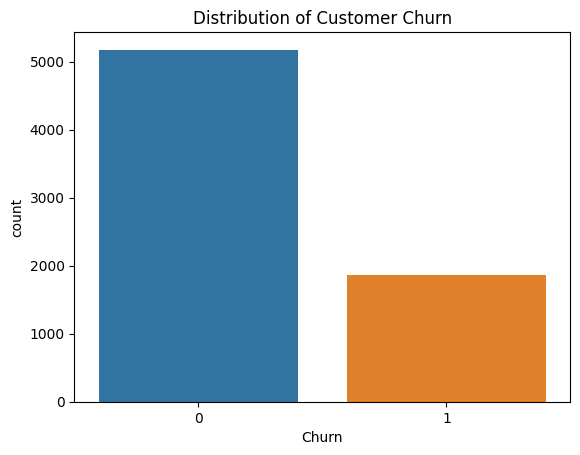

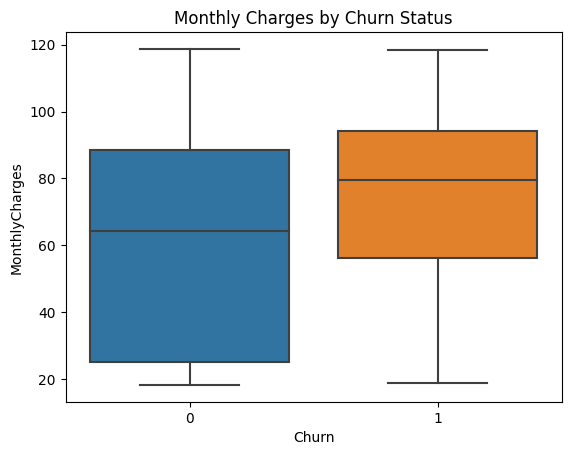

In [7]:
# Distribution of Churn
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Customer Churn')
plt.show()

# Monthly charges distribution for churned and retained customers
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.show()

A **boxplot** visually represents the distribution of data based on the following five summary statistics:

- *Minimum*: The smallest value in the dataset excluding any outliers.
- *First Quartile (Q1 or 25th percentile)*: The value below which 25% of the data falls.
- *Median (Q2 or 50th percentile)*: The middle value of the dataset.
- *Third Quartile (Q3 or 75th percentile)*: The value below which 75% of the data falls.
- *Maximum*: The largest value in the dataset excluding any outliers.
- *The Interquartile Range (IQR)*: The difference between the third quartile and the first quartile (IQR = Q3 - Q1). It represents the range within which the middle 50% of the values fall.

In [8]:
# Let's get then previous boxplot values, that is, MonthlyCharges column based on the Churn status:
groupedStats = df.groupby('Churn')['MonthlyCharges'].describe()

# Extracting the relevant values for Churn: Yes and Churn: No.
for churn_status in [1, 0]:# 1 for 'Yes' and 0 for 'No'
    if churn_status == 1:
        print(f"\nStatistics for Churn = Yes (Churned Customers):")
    if churn_status == 0:
        print(f"\nStatistics for Churn = No (Retained Customers):")
    minimum = groupedStats.loc[churn_status, 'min']
    Q1 = groupedStats.loc[churn_status, '25%']
    median = groupedStats.loc[churn_status, '50%']
    Q3 = groupedStats.loc[churn_status, '75%']
    maximum = groupedStats.loc[churn_status, 'max']
    IQR = Q3 - Q1

    print(f"Minimum: {minimum}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Median: {median}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"Maximum: {maximum}")
    print(f"IQR: {IQR}")


Statistics for Churn = Yes (Churned Customers):
Minimum: 18.85
Q1 (25th percentile): 56.15
Median: 79.65
Q3 (75th percentile): 94.2
Maximum: 118.35
IQR: 38.050000000000004

Statistics for Churn = No (Retained Customers):
Minimum: 18.25
Q1 (25th percentile): 25.1
Median: 64.42500000000001
Q3 (75th percentile): 88.4
Maximum: 118.75
IQR: 63.300000000000004


Although we could see that the company retains more customers that it loses, there is still a number of churched customers that is still substantial and warrants futher researh. From the boxplots (comparing the median), we could see that churned customers tend to have **higher** montly charges. For the retained customers, they have wider range of monthly charges. The IQR is larger than that of curned customers, indicating more variability in the montly charges of retained customers.

This first analysis suggest that **pricing** could be a significant factor influencing customer churn. Customers might find better deals *or* perceive the value for money to be low. On the other side, the wider IQR for retained customers suggests that Telco has a diverse customer base in terms of the services they use.

### Tenure analysis

Let's explore how *long* customers stay with the company before churning. With this, we could understand is newer customers are more likely to churn or if long-term ones are leaving.

*Note*: In our dataset, the tenure is indicated in [months](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113). We have the total amount of months that the customer has been with the company by the end of the third quarter specified above.

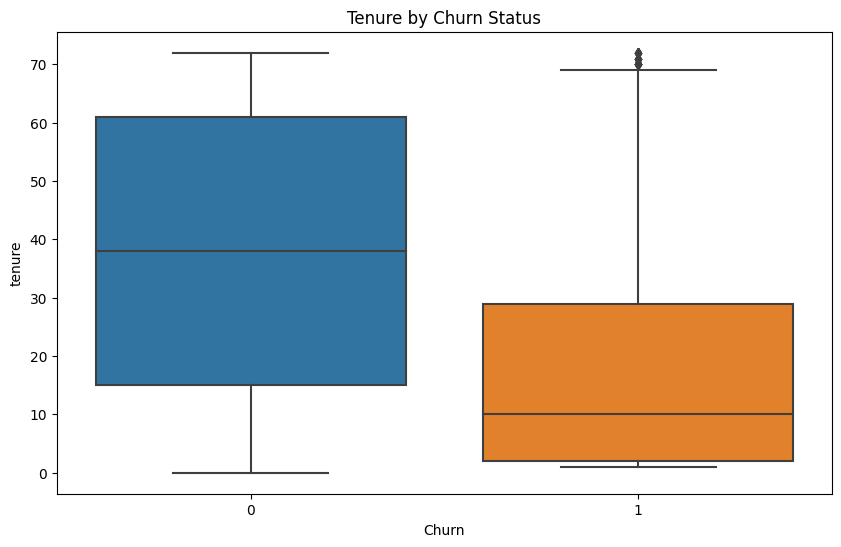

        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [9]:
# Boxplot for tenure based on Churn status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn Status')
plt.show()

# Descriptive statistics for tenure based on Churn status
grouped_tenure = df.groupby('Churn')['tenure'].describe()
print(grouped_tenure)

Customers who did not churn have a significantly longer average tenure (37.57 months) compared to those who churned (17.98 months). This indicates that **customers who stay longer with the company are less likely to churn**. On the other hand, a significant portion of customers who churned did it very early in their relationship with Telco. This is evident from the 25th percentile value of just 2 months for churned customers. The tenures of churned customers are less spread out (see standard deviation) compared to non-churned customers.

### Contract type analysis

Although we could already give some recommendations to Telco based on previous EDA result, let's continue our analysis for other features. We'll investigate the churn rate based on contract type (Month-to-month, One year, Two year). This could show if customers with shorter-term contracts are more likely to churn.

To analyze the impact of contract types on customer churn, we can perform a [**Chi-Squared Test of independence**](https://www.jmp.com/en_ca/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html#:~:text=The%20Chi-square%20test%20of%20independence%20checks%20whether%20two%20variables,idea%20is%20plausible%20or%20not.). The chi-squared test will help us determine if there's a statistically significant association between contract type and churn. For doing this approach, we need to create the *contigency table* that show the frequency distribution of customers across different contract types and their churn status. After, we test the null hypothesis that contract type and churn are independent of each other (the Chi-Squared Test). Based on the final p-value, we'll determine if there's a significant association between contract type and churn.

In [10]:
from scipy.stats import chi2_contingency

# We create the contingency table:
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# We perform the chi-squared test:
chi2Stat, p, dof, _ = chi2_contingency(contingency_table) # Chi^2 statistic, p-value, and degrees of freedom.

# Results:
print("Chi-Squared Value:", chi2Stat)
print("P-Value:", p)

# Interpretation:
if p < 0.05:
    print("There is a statistically significant association between contract type and churn.")
else:
    print("There is no statistically significant association between contract type and churn.")

Chi-Squared Value: 1184.5965720837926
P-Value: 5.863038300673391e-258
There is a statistically significant association between contract type and churn.


Let's create some visualizations to help in a better understanding of this test. First, we nned to find the critical value from the Chi-square distribution based on our degrees of freedom and our significance level. This is the value we expect if the two variables are independent.The degrees of freedom for a chi-squared test on a contingency table is calculated as:

$degreesFreedom = (numberRows -1)x(numberColumns -1)$

For our case with the 3 different contract types, and the churn statuses, the degrees of freedom would be:

$degreesFreedom = (3-1)x(2-1)=2$

In [11]:
# We could even check it too with the library!
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 2


Given this, we can plot the chi-square distribution with 2 degrees of freedom and highlight the region beyond our test statistic to visualize the p-value.

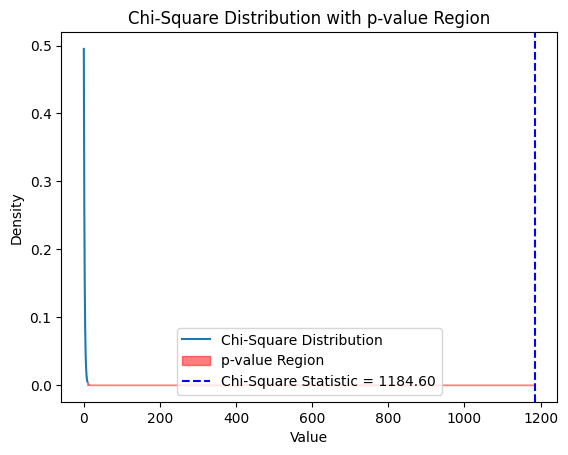

In [12]:
from scipy.stats import chi2

degreesFreedom = 2

# Generate values for chi-square distribution:
x = np.linspace(chi2.ppf(0.01, degreesFreedom), chi2.ppf(0.99, degreesFreedom), 1000)

# Plot the chi-square distribution:
plt.plot(x, chi2.pdf(x, degreesFreedom), label='Chi-Square Distribution')

# Shade the region beyond our test statistic:
x_fill = np.linspace(chi2Stat, chi2.ppf(0.99, degreesFreedom), 1000)
plt.fill_between(x_fill, chi2.pdf(x_fill, degreesFreedom), color='red', alpha=0.5, label='p-value Region')

# Add vertical line for our test statistic:
plt.axvline(x=chi2Stat, color='blue', linestyle='--', label=f'Chi-Square Statistic = {chi2Stat:.2f}')

# Add labels and legend:
plt.title('Chi-Square Distribution with p-value Region')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

This behavior is expected given the large chi2Stat value. Nevertheless, it is still challenging to visualize both the distribution and the statistic on the same plot. The Chi-Squared Distribution is for 2 degrees of freedom, which is centered around lower values. When we have a chi2Stat as large as 1184.60, it's far to the right of the typical distribution for 2 degrees of freedom, making the distribution look like a line close to the y-axis.

To make the visualization more informative, we can focus on the tail of the distribution, starting from a point closer to the chi-squared statistic.

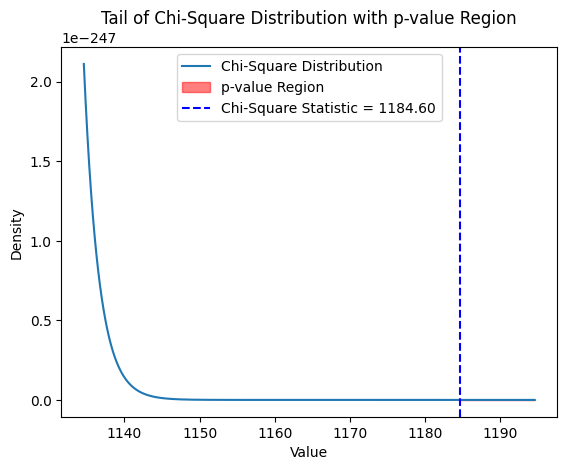

In [13]:
start_point = chi2Stat - 50  # Start 50 units before the chi-squared statistic.
x = np.linspace(start_point, chi2Stat + 10, 1000)  # Extend a bit beyond the chi-squared statistic.

plt.plot(x, chi2.pdf(x, degreesFreedom), label='Chi-Square Distribution')

x_fill = np.linspace(chi2Stat, chi2Stat + 10, 1000)
plt.fill_between(x_fill, chi2.pdf(x_fill, degreesFreedom), color='red', alpha=0.5, label='p-value Region')

plt.axvline(x=chi2Stat, color='blue', linestyle='--', label=f'Chi-Square Statistic = {chi2Stat:.2f}')

plt.title('Tail of Chi-Square Distribution with p-value Region')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()

In [14]:
cdf_value = chi2.cdf(chi2Stat, degreesFreedom)
p_value = 1 - cdf_value
print(f"CDF at Chi-Squared Statistic = {chi2Stat:.2f}: {cdf_value:.10f}")
print(f"P-Value: {p_value:.10f}")

CDF at Chi-Squared Statistic = 1184.60: 1.0000000000
P-Value: 0.0000000000


We don't see the p-value region in red, this is likely because chi2Stat is so extreme that the p-value region (the area to the right of the chi2Stat) is almost negligible on the plot. We just confirmed this by checking the values of the cumulative distribution function of the distribution at the chi2Stat. As the value is very close to 1, then the p-value is very close to 0.

Let's interpret the results: The chi-squared statistic measures the difference between the observed frequencies (what we actually observed in our dataset) and the expected frequencies (what we would expect if there was no association between the two variables). A large chi-squared statistic indicates that the observed and expected frequencies are different.

With a value of 1184.60, the chi-squared statistic is considerably large. This suggests that the observed frequencies of churn across different contract types are significantly different from what would be expected under the assumption of no association.

Additionally, in the context of this chi-squared test, the null hypothesis states that there is no association between the contract type and churn. Our p-value is a measure of the evidence against the null hypothesis. A p-value close to 0 (or the exact one we have of 5.863038300673391e-258... which is virtually zero) provides very strong evidence against the null hypothesis. Given the extremely low p-value, we reject the null hypothesis.

In summary, **the type of contract a customer has with the company plays a significant role in determining whether they churn or not**. There is a statistically significant association between contract type and churn. Some contract types might be leading to higher or lower churn rates compared to others. Let's study this a bit more!

### Extra:Which contract types are associated with higher churn?

(This could be interesting for the business recommendations).

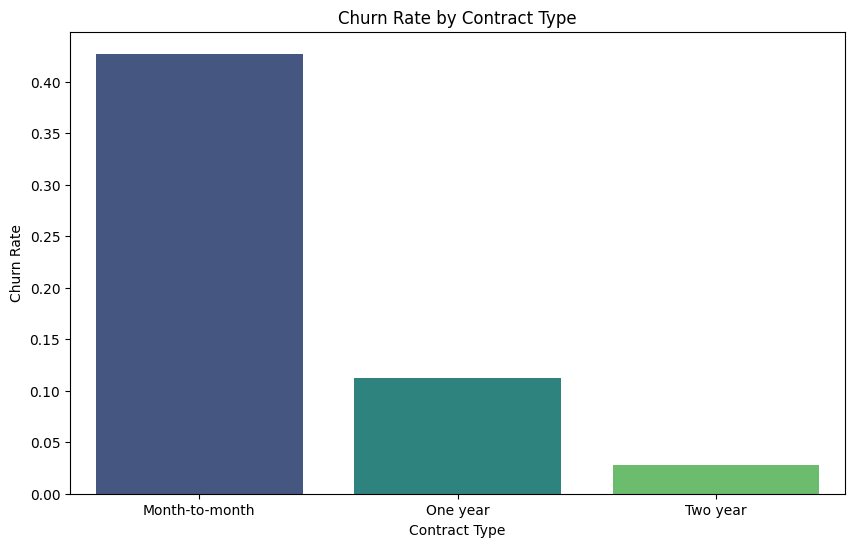

In [15]:
# Calculate churn rate for each contract type
churn_rate_by_contract = df.groupby('Contract')['Churn'].mean() # Proportion of customers who churned for each contract type

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_contract.index, y=churn_rate_by_contract.values, palette="viridis")
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.show()

- The churn rate decreases as the contract duration increases.
- Customers with month-to-month contracts (>40%) have the highest churn rate among all contract types ('volatile'). This suggests that customers who are not bound by long-term contracts are more likely to leave the service. This could be because they have the flexibility to switch providers without any penalties or long-term commitments.

### Service Used

Let's highlight which services are valued by customers and which might be causing dissatisfaction.

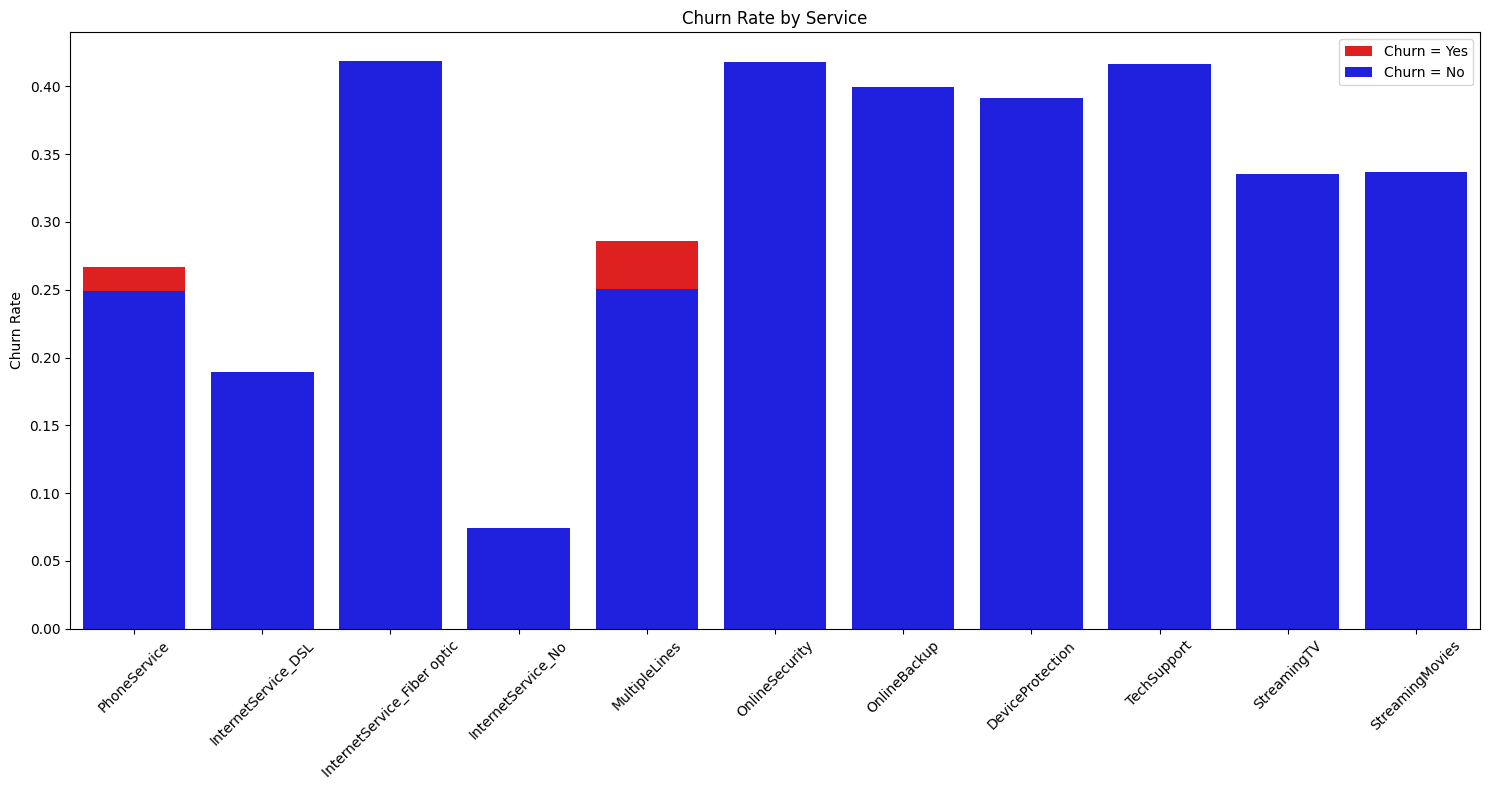

In [16]:
# List of services to analyze:
services = ['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Dictionary to store churn rates:
churn_rates = {}

for service in services:
    if service == 'PhoneService': # Remember we re-define as a binary feature.
        churn_rate_yes = df[df[service] == 1]['Churn'].mean()
        churn_rate_no = df[df[service] == 0]['Churn'].mean()
        churn_rates[service] = {'Yes': churn_rate_yes, 'No': churn_rate_no}
    elif service == 'InternetService': # Categorical variable.
        for category in ['DSL', 'Fiber optic', 'No']:
            churn_rate = df[df[service] == category]['Churn'].mean()
            churn_rates[service + '_' + category] = churn_rate
    else: # We are not considering the cases in which they are not subscribe to the service.
        churn_rate_yes = df[df[service] == 'Yes']['Churn'].mean()
        churn_rate_no = df[df[service] == 'No']['Churn'].mean()
        churn_rates[service] = {'Yes': churn_rate_yes, 'No': churn_rate_no}

# Let's convert dictionary to df for visualization:
churn_df = pd.DataFrame(churn_rates).T

# Plot:
plt.figure(figsize=(15, 8))
sns.barplot(x=churn_df.index, y=churn_df['Yes'], color='red', label='Churn = Yes')
sns.barplot(x=churn_df.index, y=churn_df['No'], color='blue', label='Churn = No')
plt.xticks(rotation=45)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Service')
plt.legend()
plt.tight_layout()
plt.show()

This first plot gives an aggregate view, while we're comparing the churn rate for each service. The only services where we can visually see a red bar indicates that there's a noticeable churn rate. However, it's still smaller compared to the retention rate (blue bar). We could provide a more detailed breakdown.

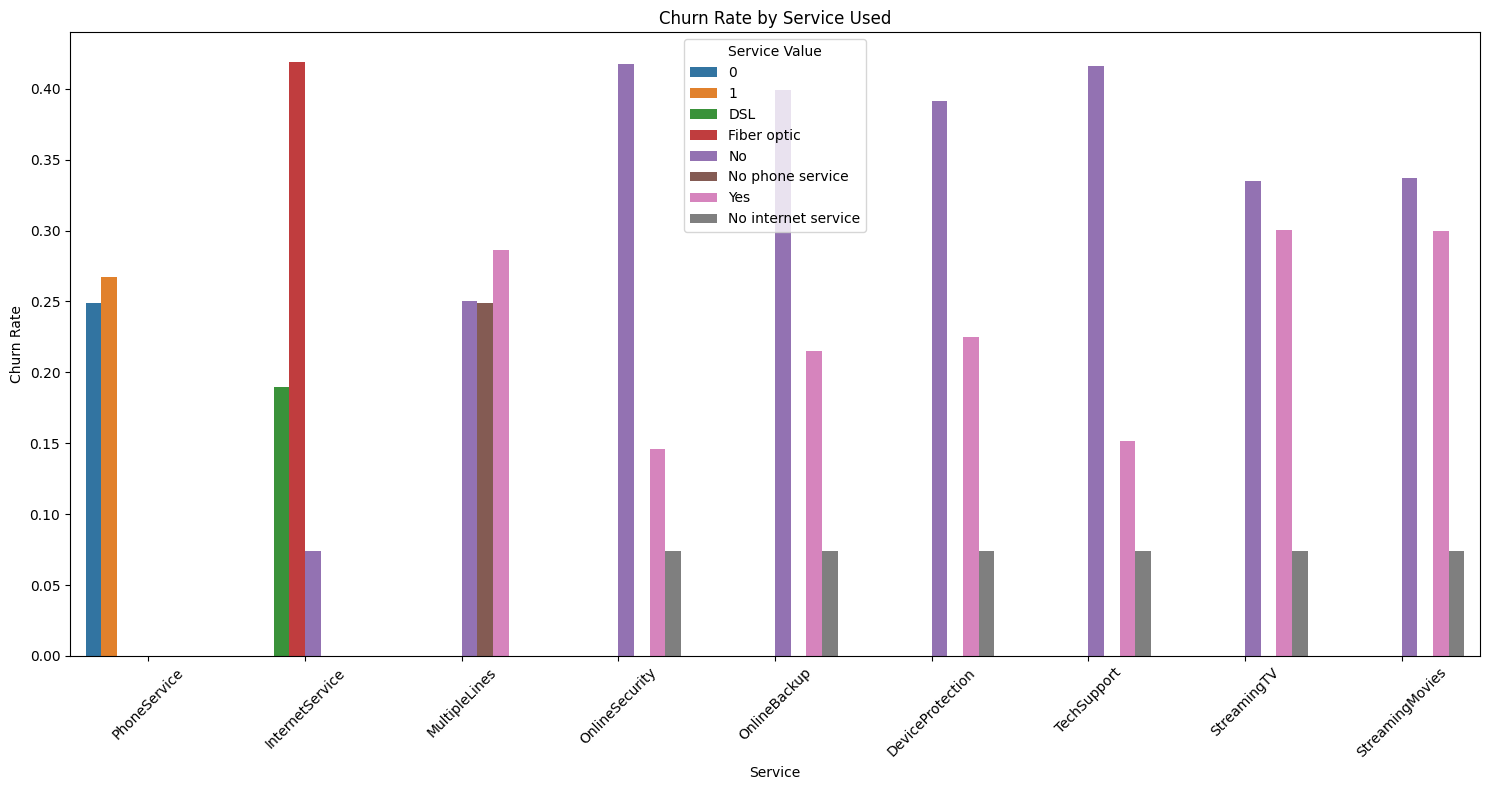

In [17]:
# List of services and their unique values:
services_dict = {service: df[service].unique().tolist() for service in services}

# Calculate churn rate for each service category:
churn_data = []
for service, values in services_dict.items():
    for value in values:
        total_users = df[df[service] == value].shape[0]
        churned_users = df[(df[service] == value) & (df['Churn'] == 1)].shape[0]
        churn_rate = churned_users / total_users
        churn_data.append([service, value, churn_rate])

# For visualization:
churn_df = pd.DataFrame(churn_data, columns=['Service', 'Value', 'ChurnRate'])

# Plot:
plt.figure(figsize=(15, 8))
sns.barplot(x='Service', y='ChurnRate', hue='Value', data=churn_df)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Service Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Service Value')
plt.show()

Based on previous plot, let's investigate why the churn rate is high for customers with fiber optic service. Is it related to other factor? (Pricing, quality, etc)

In [18]:
# Let's filter the df for customers with fiber optic service:
fiber_df = df[df['InternetService'] == 'Fiber optic']

# 1. Service Quality:
tech_support_churn = fiber_df[fiber_df['TechSupport'] == 'No']['Churn'].mean()
online_security_churn = fiber_df[fiber_df['OnlineSecurity'] == 'No']['Churn'].mean()

# 2. Pricing:
avg_monthly_charge_churned = fiber_df[fiber_df['Churn'] == 1]['MonthlyCharges'].mean()
avg_monthly_charge_not_churned = fiber_df[fiber_df['Churn'] == 0]['MonthlyCharges'].mean()

# 3. Contract Duration:
contract_churn = fiber_df.groupby('Contract')['Churn'].mean()

# 4. Additional Services:
streaming_tv_churn = fiber_df[fiber_df['StreamingTV'] == 'No']['Churn'].mean()
streaming_movies_churn = fiber_df[fiber_df['StreamingMovies'] == 'No']['Churn'].mean()

print(f"Churn rate for customers without TechSupport: {tech_support_churn:.2f}")
print(f"Churn rate for customers without OnlineSecurity: {online_security_churn:.2f}")
print(f"\nAverage monthly charge for churned customers: ${avg_monthly_charge_churned:.2f}")
print(f"Average monthly charge for non-churned customers: ${avg_monthly_charge_not_churned:.2f}")
print(f"\nChurn rate by contract type:\n{contract_churn}")
print(f"\nChurn rate for customers without StreamingTV: {streaming_tv_churn:.2f}")
print(f"Churn rate for customers without StreamingMovies: {streaming_movies_churn:.2f}")

Churn rate for customers without TechSupport: 0.49
Churn rate for customers without OnlineSecurity: 0.49

Average monthly charge for churned customers: $88.13
Average monthly charge for non-churned customers: $93.93

Churn rate by contract type:
Contract
Month-to-month    0.546053
One year          0.192950
Two year          0.072261
Name: Churn, dtype: float64

Churn rate for customers without StreamingTV: 0.45
Churn rate for customers without StreamingMovies: 0.46


- Customers with fiber optic service who do not have TechSupport and OnlineSecurity have a high churn rate of 49%. This suggests that the absence of these support services might be a significant factor in their decision to leave. **It indicates that customers value these services** and their absence could lead to dissatisfaction. They don't see enough value in the fiber optic service alone without these additional features. *We can see this reflected in the previous plot*.
- We could arrive to a similar thinking for thec ustomers without StreamingTV and StreamingMovies. Customers who aren't using these additional services are more likely to churn. *This also corresponds to our previous plot*.
- Pricing might not be the primary reason for churn among fiber optic customers.
- Customers with short-term commitments are more likely to leave, possibly because they have the flexibility to do so without incurring penalties. This agree with our previous result when we examinated the contract types.

### Payment Method

Let's examinate if there's a correlation between payment method and churn.

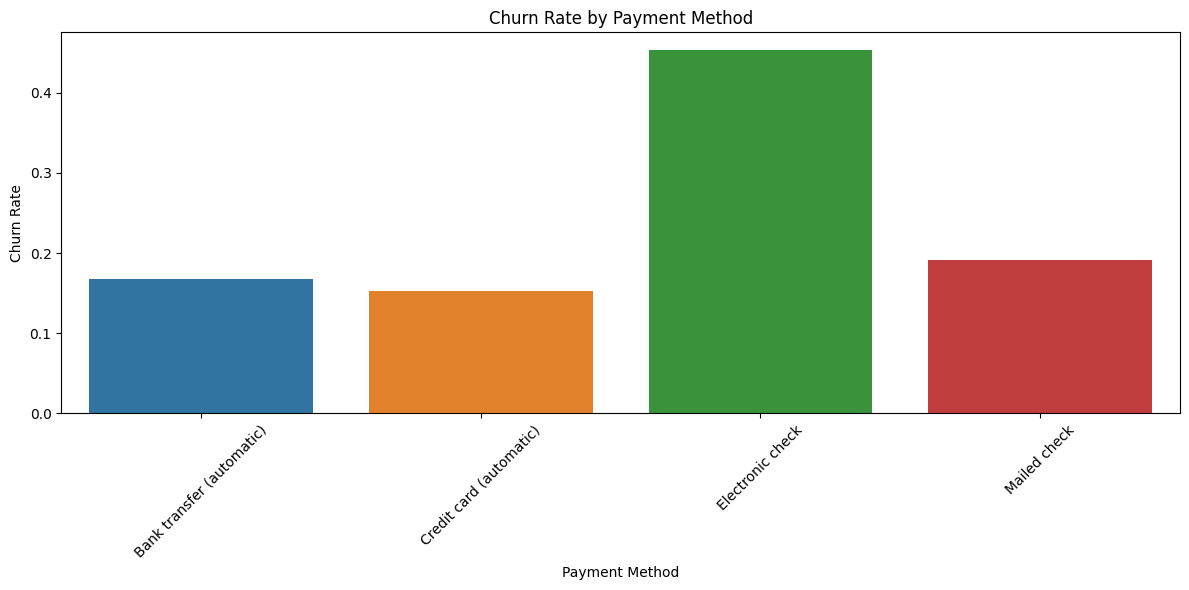

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64


In [19]:
# Calculate churn rate for each payment method:
payment_churn_rate = df.groupby('PaymentMethod')['Churn'].mean()

# Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_churn_rate.index, y=payment_churn_rate.values)
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's print the churn rates for each payment method.
print(payment_churn_rate)

- Automatic payment methods like bank transfers and credit cards seem to be more reliable and convenient for customers, leading to lower churn rates.
- Customers who use electronic checks have the highest churn rate at approximately 45.3%. This is significantly higher than any other payment method. This could indicate potential issues with this payment method, such as processing delays, errors, or other inconveniences that might be causing dissatisfaction among customers.

Let's futher understand this: We would investigate the churn rate for senior citizens based on their payment method, especially focusing on electronic checks.

### Extra: Demographic Analysis of Senior Citizen.

Total number of customers: 7043
Number of senior citizens: 1142 (16.21%)
Number of non-senior citizens: 5901 (83.79%)

Churn rate for senior citizens by payment method:
PaymentMethod
Bank transfer (automatic)    0.227468
Credit card (automatic)      0.280543
Electronic check             0.533670
Mailed check                 0.468085
Name: Churn, dtype: float64


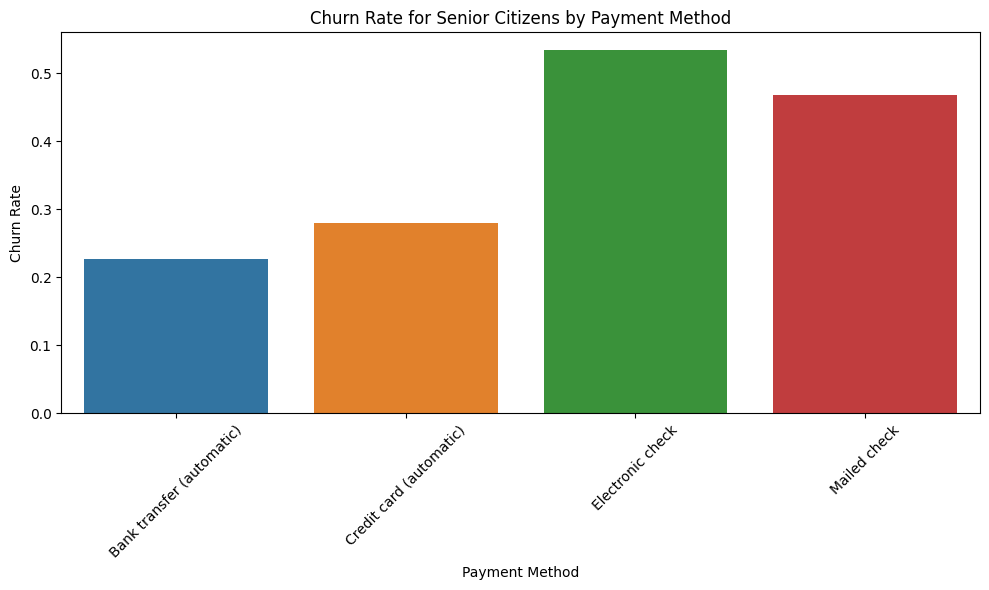

In [20]:
# 1. Proportion of senior citizens in the dataset
total_customers = df.shape[0]
senior_citizens = df[df['SeniorCitizen'] == 1].shape[0]
non_senior_citizens = df[df['SeniorCitizen'] == 0].shape[0]

print(f"Total number of customers: {total_customers}")
print(f"Number of senior citizens: {senior_citizens} ({(senior_citizens/total_customers)*100:.2f}%)")
print(f"Number of non-senior citizens: {non_senior_citizens} ({(non_senior_citizens/total_customers)*100:.2f}%)")

# 2. Churn rate for senior citizens based on their payment method
senior_churn_by_payment = df[df['SeniorCitizen'] == 1].groupby('PaymentMethod')['Churn'].mean()

print("\nChurn rate for senior citizens by payment method:")
print(senior_churn_by_payment)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=senior_churn_by_payment.index, y=senior_churn_by_payment.values)
plt.title("Churn Rate for Senior Citizens by Payment Method")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Senior citizens make up 16.21% of the total customer base. This is a significant proportion, indicating that they are a notable segment of the customer base. As we could have imagined, the churn rate for senior citizens using electronic checks is the highest at 53.37%. This indicates that more than half of the senior citizens using this payment method end up churning. This could be due to various reasons:
- They might find the electronic check process confusing or not user-friendly.
- There could be frequent issues or errors with electronic check processing that affect senior citizens more.
- It's also possible that senior citizens prefer more traditional methods of payment and are not comfortable with electronic checks.

Nevertheless, the fact that the churn rate for mailed checks is also high suggests that senior citizens might face challenges with both electronic and traditional payment methods. This could be due to reasons like forgetfulness, or misplacing mailed checks.

### Correlation Analysis

Now, we'll work with the numerical features like MonthlyCharges, TotalCharges, and tenure to see if there are any strong relationships that might be influencing churn.

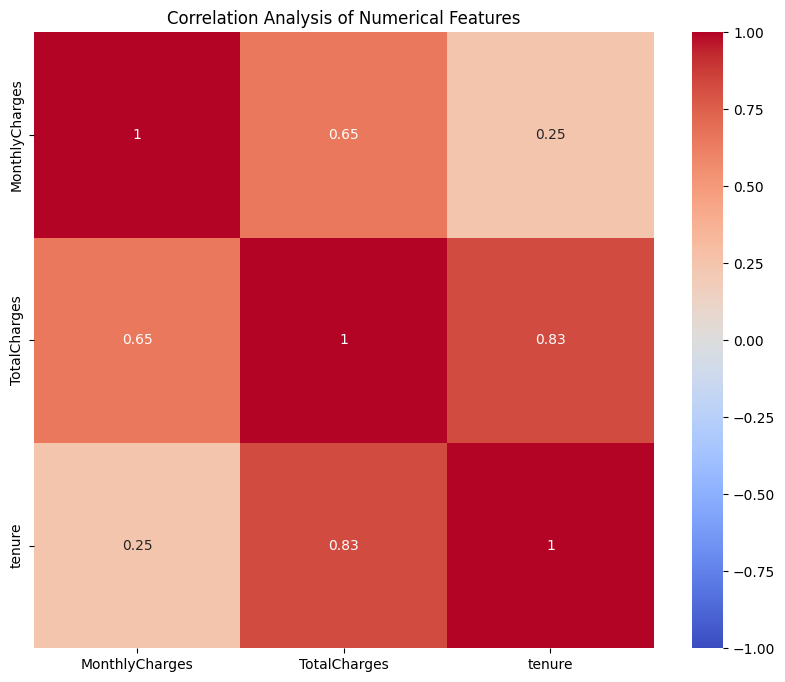

In [21]:
# Just in case, let's drop any NaN values that might have been introduced during our conversion.
df.dropna(subset=['TotalCharges'], inplace=True)

# Extract relevant columns:
correlation_data = df[['MonthlyCharges', 'TotalCharges', 'tenure']]

# Calculate the correlation matrix:
correlation_matrix = correlation_data.corr()

# Heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Analysis of Numerical Features')
plt.show()

We notice there's a moderately strong positive correlation between the total charges a customer has paid and their monthly charges.  As one might expect, customers with higher monthly charges tend to have accumulated higher total charges over time. The weak correlation between monthly charges and tenure suggests that there's variability in what long-term customers are paying. It might be worth investigating if long-term customers are on outdated plans and if there's an opportunity to upsell or migrate them to newer plans.

## Model building

It's often more expensive for a company to acquire a new customer than to retain an existing one. By predicting which customers are likely to churn, the company can take proactive measures to retain them, thus saving on acquisition costs. For example, if the company knows which customers are at risk of churning (like the many examples we saw above), the company can target them with special offers, discounts, or loyalty programs to encourage them to stay.

A decision tree is a good choice for doing model building, for several reasons:

- *Interpretability*: Decision trees are easy to understand and interpret. They provide clear rules for why a particular decision (in this case, predicting churn) was made. This can be invaluable for business stakeholders who want to understand the model's predictions.

- *Handling Categorical Data*: Decision trees can handle both numerical and categorical data, which is useful given the mix of data types in this dataset.

- *Feature Importance*: Decision trees provide insights into which features are most important for predictions. This can guide business strategies.

In [22]:
# Let's import relevant libraries:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

### Data Preprocessing

Let's convert categorical vaiables into a format suitable for modeling.

In [23]:
# Convert 'Yes' and 'No' to binary 1 and 0:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# Convert categorical variables to dummy variables:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)

# Drop customerID as it's not needed for modeling:
df.drop('customerID', axis=1, inplace=True)

# To display the first few rows of the dataset:
print(df.head())

print("-" * 100)

# To get a summary of the dataset:
df.info()

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                    

### Model Training and Evaluation

We will train the decision tree classifier, and after, evaluate the model's performance on the testing data using some metrics.

In [24]:
# !pip install imbalanced-learn

In [25]:
# Splitting the data into training and testing sets (80% train, 20% test)
X = df.drop('Churn', axis=1)  # Features (excluding the target variable 'Churn')
y = df['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.47      0.52      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407


Confusion Matrix:
[[818 215]
 [181 193]]


The model correctly predicts wether a customer would churn or not for 72% of the test set. The precision for customers who churned (indicated as 1) is 0.47. This means that out of all the customers the model predicted would churn, only 47% actually did churn. On the other hand, the recall for customers who churned is 0.52. This means that the model correctly identified 52% of all the customers who actually churned.

Regardding the confusion matrix:
- *True Negative (TN)* = 818: The model correctly predicted that 818 customers would not churn.
- *False Positive (FP)* = 215: The model incorrectly predicted that 215 customers would churn, but they did not.
- *False Negative (FN)* = 181: The model incorrectly predicted that 181 customers would not churn, but they did.
- *True Positive (TP)* = 193: The model correctly predicted that 193 customers would churn.

It seems the model performs better at predicting customers who won't churn compared to those who will. As we can see, the F1-score for the label 0(won't churn) has a higher precision (0.81).

Let's visualize this results:

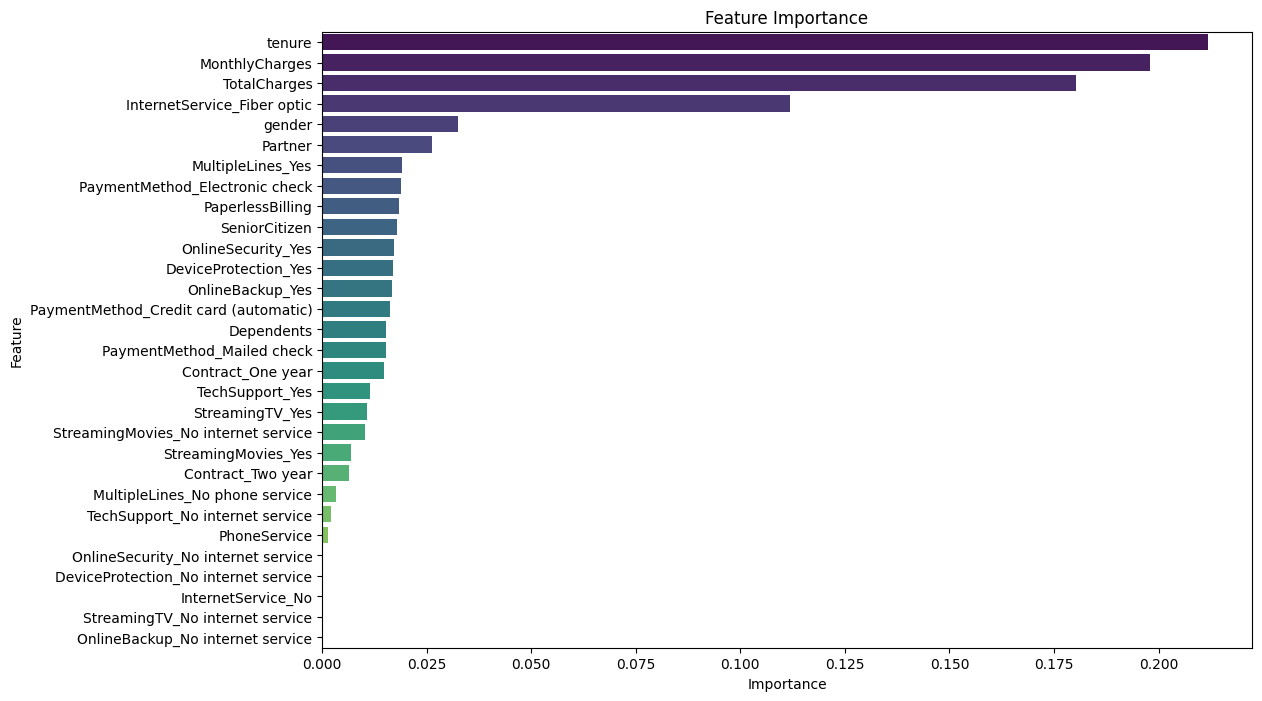

In [26]:
feature_importance = clf.feature_importances_

# Let's create a df for the feature importance:
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the df by importance:
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [27]:
!pip install graphviz


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.tree import export_graphviz
import graphviz

# We export the decision tree:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Churn', 'Churn'],
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=3)  # Limiting tree depth for better visualization

# Visualize the tree:
graph = graphviz.Source(dot_data)  
graph.render("churn_tree", view=True, format='png')  # This will save the tree as 'churn_tree.png' and open it for viewing.

'churn_tree.png'

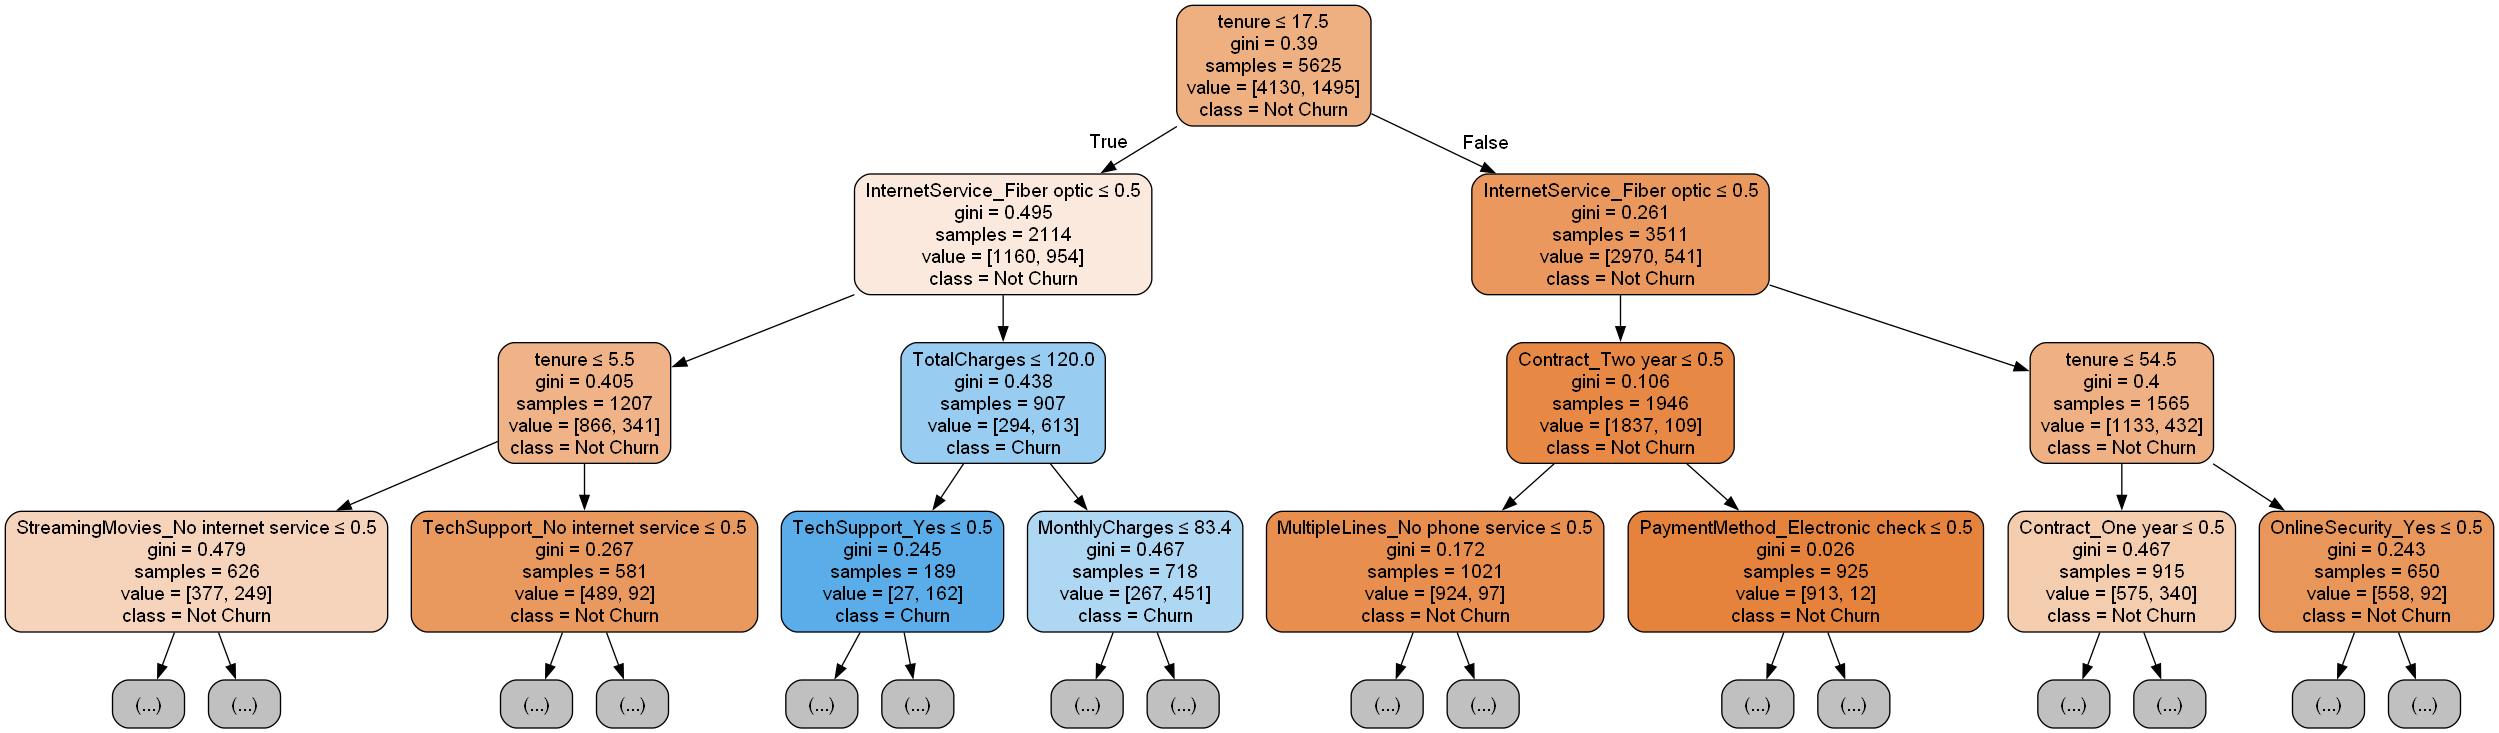

Based on our last 2 visualizations, the most important feature is the Tenure (this is in fact in line with previous analyses we have done). This suggests that the length of time a customer has been with the company is a strong predictor of whether they will churn or not. The longer a customer has been with the company, the less likely they are to churn.

After Tenure, we have the MonthlyCharges (which also lines with our previous EDA). It suggests that the amount a customer is charged monthy plays a significant role in their decision to stay with or leave the company.

The total amount a customer has been charged over their tenure is also a significant predictor. This could be related to the overall value or satisfaction a customer feels they've received over time.

Customers with fiber optic internet service seem to have a different churn behavior compared to others. This could be because fiber optic is typically faster and might have different pricing or customer satisfaction levels.

This features behaviours are reflect in our decision tree visualization! **The decision tree starts by evaluating the Tenure of a customer**.

In the first node, for customers with a tenure of 17.5 months or less, the next most important factor is whether they have fiber optic internet service. If they don't, they're more likely to be classified as "no churn". This suggests that among newer customers (tenure <= 17.5), those without fiber optic service are less likely to churn.

In the second node, for customers with a tenure greater than 17.5 months, again, the type of internet service is a significant factor. If they don't have fiber optic service, they're more likely to be classified as "no churn". This suggests that among longer-tenured customers, those without fiber optic service are also less likely to churn.

In summary: The decision tree suggests that Tenure and the type of InternetService (specifically fiber optic) are key factors in predicting customer churn. Customers with shorter tenures and those with fiber optic service seem to be more at risk of churning. Other factors like MonthlyCharges, TotalCharges, etc; also play a role, but Tenure and InternetService are the primary decision points in this tree. Again, this alines with our previous EDA results.

## Insights, strategies, and recommendations:

#### **1. Overview:**
Our analysis indicates that while the company retains a majority of its customers, there remains a substantial number of churned customers that necessitate further investigation. **Our data analysis suggests that pricing, tenure, contract type, and certain services play pivotal roles in influencing customer decisions to stay or leave**.

#### **2. Key Insights:**
*What are the key factors that influence customer churn in a subscription-based service?*

- **Pricing and Services**: Churned customers tend to have higher monthly charges, suggesting that they might be finding better deals elsewhere or perceive a lack of value for their money. Retained customers exhibit a broader range of monthly charges, indicating a diverse service utilization.
  
- **Tenure**: Customers who have been with the company longer are less likely to churn. Notably, a significant portion of customers who churn do so early in their relationship with the company, with a 25th percentile value of just 2 months.

- **Contract Type**: Customers with shorter, month-to-month contracts exhibit the highest churn rates, suggesting the flexibility to switch providers without penalties might be influencing their decision.

- **Internet Service**: Customers with fiber optic services but lacking additional features like TechSupport and OnlineSecurity have a higher propensity to churn. This indicates the importance of these supplementary services in customer retention.

- **Payment Methods**: Customers using electronic checks have the highest churn rate, hinting at potential issues with this payment method.

- **Senior Citizens**: Representing over 16% of the customer base, senior citizens using electronic checks have a notably high churn rate, suggesting challenges with both electronic and traditional payment methods.

#### **3. Recommendations:**
*How can these insights be powered to reduce attrition rates?*

- **Enhance Early Customer Experience**: Given the early churn observed, the company should prioritize strategies to enhance the experience for new customers, especially during their initial months. This could include onboarding programs, introductory offers, or dedicated support.

- **Optimize Contract Offerings**: Understanding the specifics of each contract type can provide insights into optimizing customer retention. For instance, offering incentives for longer-term contracts might reduce churn rates among month-to-month contract holders.

- **Service Enhancement**: A deeper investigation into the fiber optic service is recommended. Understanding why customers with this service, especially those lacking additional features, are churning at higher rates can provide actionable insights. Promoting valued services, like TechSupport and OnlineSecurity, can also bolster retention.

- **Payment Method Improvements**: Addressing the high churn rate associated with electronic checks is crucial. This could involve streamlining the payment process, offering alternative payment methods, or providing dedicated support.

- **Senior Citizen Engagement**: Given the significant proportion of senior citizens and their associated churn rates, tailored strategies are essential. This could include user-friendly tutorials, dedicated customer support, or special payment plans. Regular feedback sessions can also provide invaluable insights into their preferences and challenges.

- **Feedback Mechanism**: Implementing a robust feedback mechanism, especially for churned customers, can provide deeper insights into the reasons for their departure. This can be particularly beneficial for understanding the nuances of why certain services or payment methods are leading to higher churn.

#### **4. Conclusion:**
While our model provides valuable insights into customer behavior, continuous improvement is essential for better prediction accuracy. For example, we didn't consider gender in this analysis and it could be an interesting feature to investigate in the future. As customer retention is often more cost-effective than acquisition, enhancing our model and implementing the above recommendations can significantly impact the company's bottom line.